# Programming Assignment 1: Linear Systems in NumPy

### CS70 — Foundations of Applied Computer Science
---

This notebook contains literate code, i.e. brief fragments of Python surrounded by descriptive text (using Markdown). Please complete/extend this notebook for your homework submission:

* For any mathematical questions, make sure to **show you work**.
* For any questions that ask for code, please **also provide a short description of what your solution is doing and how it works**, either by adding comments or in an extra markdown cell.

Make sure to use the reference Python distribution so that project files can be opened by the TAs. In this course, we use [Anaconda](https://www.anaconda.com/products/individual), specifically the version based on Python 3.8.

<div class="alert alert-warning">
Homework assignments in CS70 count towards your final grade and must therefore be done individually.
</div>
$$
\newcommand{\mA}{\mathbf{A}}
\newcommand{\mB}{\mathbf{B}}
\newcommand{\mC}{\mathbf{C}}
\newcommand{\mD}{\mathbf{D}}
\newcommand{\mE}{\mathbf{E}}
\newcommand{\mF}{\mathbf{F}}
\newcommand{\mG}{\mathbf{G}}
\newcommand{\mH}{\mathbf{H}}
\newcommand{\mI}{\mathbf{I}}
\newcommand{\mJ}{\mathbf{J}}
\newcommand{\mK}{\mathbf{K}}
\newcommand{\mL}{\mathbf{L}}
\newcommand{\mM}{\mathbf{M}}
\newcommand{\mN}{\mathbf{N}}
\newcommand{\mO}{\mathbf{O}}
\newcommand{\mP}{\mathbf{P}}
\newcommand{\mQ}{\mathbf{Q}}
\newcommand{\mR}{\mathbf{R}}
\newcommand{\mS}{\mathbf{S}}
\newcommand{\mT}{\mathbf{T}}
\newcommand{\mU}{\mathbf{U}}
\newcommand{\mV}{\mathbf{V}}
\newcommand{\mW}{\mathbf{W}}
\newcommand{\mX}{\mathbf{X}}
\newcommand{\mY}{\mathbf{Y}}
\newcommand{\mZ}{\mathbf{Z}}
\newcommand{\transpose}{\mathsf{T}}
$$

## Import Statements

We provide the import statements required to complete the assignment in the following cell. 

<div class="alert alert-danger" role="alert">
    <b>Import Policy:</b> You must not use any <code>import</code>'s other than the ones we provide.
</div>

<div class="alert alert-info" role="alert">
    <b>Run</b> the following cell in the Jupyter Notebook to include the required modules.
</div>

In [1]:
from pa1lib import *

%matplotlib inline
# Retina Graphics (High-Resolution Screens)
%config InlineBackend.figure_format = 'retina' 

# Linear Systems in Numpy

## Problem 1 (2 points)

Consider the matrices:

$ \mA := \begin{bmatrix}
3 \\
-2
\end{bmatrix} $

$ \mB := \begin{bmatrix}
6 & 1 \\
-3 & 5
\end{bmatrix} $

$ \mC := \begin{bmatrix}
7 & 3 \\
-2 & 9
\end{bmatrix} $

$ \mD := \begin{bmatrix}
6 & -2 \\
-3 & -4 \\
9 & 8
\end{bmatrix} $

Compute the following values using NumPy and print them out. If the values are undefined, briefly explain why.

* $ 4 \mA $
* $ 5 \mB - 2 \mC $
* $ \mC \mA $
* $ \mA^\transpose \mD^\transpose $
* $ \mD \mC $
* $ \mC \mB $
* $ \mC \mB^\transpose $

*Hint:*
Remember that you can create and print a (for example $ 2 \times 3 $) matrix using code like:
```python
a = np.array([[5, 5, -2],
             [2, 0,  4]])

print(f'a =\n{a}')
```
Most arithmetic operations are defined for NumPy arrays element-wise. Also, if you have two NumPy arrays `A` and `B`, you can perform matrix-matrix (or matrix-vector) multiplication using the `@` operator as `A @ B`. You can compute the transpose of a matrix using `A.T`.


In [2]:
# Matrices - Set Up
# Creating the matrices using NumPy arrays.
A = np.array([[3], [-2]])
B = np.array([[6, 1], [-3, 5]])
C = np.array([[7, 3], [-2, 9]])
D = np.array([[6, -2], [-3, -4], [9, 8]])

# Printing the matrices to check the set up.
# print(f'A = \n{A}\n')
# print(f'B = \n{B}\n')
# print(f'C = \n{C}\n')
# print(f'D = \n{D}\n')

# Solutions
# (Leave as 'None' is undefined.)

# Computing the following values using NumPy and printing the results.
four_A = 4 * A # Element-Wise Multiplication
print(f'four_A = \n{four_A}\n')

five_B_minus_two_C = (5 * B) - (2 * C) # Element-Wise Multiplication & Subtraction
print(f'five_B_minus_2_C = \n{five_B_minus_two_C}\n')

CA = C @ A # Matrix Multiplication
print(f'CA = \n{CA}\n')

At_Dt = A.T @ D.T # Transpose & Matrix Multiplication
print(f'At_Dt = \n{At_Dt}\n')

DC = D @ C # Matrix Multiplication
print(f'DC = \n{DC}\n')

CB = C @ B # Matrix Multiplication
print(f'CB = \n{CB}\n')

C_Bt = C @ B.T # Transpose & Matrix Multiplication
print(f'C_Bt = \n{C_Bt}\n')

four_A = 
[[12]
 [-8]]

five_B_minus_2_C = 
[[ 16  -1]
 [-11   7]]

CA = 
[[ 15]
 [-24]]

At_Dt = 
[[22 -1 11]]

DC = 
[[ 46   0]
 [-13 -45]
 [ 47  99]]

CB = 
[[ 33  22]
 [-39  43]]

C_Bt = 
[[45 -6]
 [-3 51]]



## Problem 2 (3 points)

Here we ask you to implement your own matrix-matrix multiplication and matrix transpose operations by calculating the value of each matrix element using its linear algebra definitions and compare the results to the ones you have calculated with the built-in NumPy functions:

a) Write your own matrix-matrix (or matrix-vector) multiplication function.

b) Compute the transpose of a matrix without using .T

In [3]:
def Matrix_Multiplication(M_A, M_B):
    # Checking to make sure the sizes of M_A and M_B are compatible.
    if M_A.shape[1] != M_B.shape[0]:
        print('Error: Incorrect Dimensions')
        M_AB = None
    else:
        # Creating a new matrix M_AB that is of the appropriate shape.
        M_AB = np.zeros((M_A.shape[0], M_B.shape[1]))
        
        for i in range(M_A.shape[0]): # Iterating through the rows of the first matrix.
            for j in range(M_B.shape[1]): # Iterating through the columns of the second matrix.
                for k in range(M_A.shape[1]): # Iterate through the elements of each matrix.
                    M_AB[i][j] += M_A[i][k] * M_B[k][j] # Calculating the element at position [i][j].
    
    return M_AB # Returning the final result.

In [4]:
def Transpose(M):
    # Creating a new matrix M_t that is of the appropriate shape.
    M_t = np.zeros((M.shape[1], M.shape[0]))
    
    for i in range(M.shape[0]): # Iterating through the rows of the matrix.
        for j in range(M.shape[1]): # Iterating through the columns of the matrix.
            M_t[j][i] = M[i][j] # Calculating the element at position [j][i].
    
    return M_t

In [5]:
# Compare the results from your functions to your earlier results from NumPy.

# Solutions
# (Leave as 'None' is undefined.)

# Computing the following values using the functions and printing the results.
four_A = 4 * A
print(f'four_A = \n{four_A}\n')

five_B_minus_two_C = (5 * B) - (2 * C)
print(f'five_B_minus_2_C = \n{five_B_minus_two_C}\n')

CA = Matrix_Multiplication(C, A)
print(f'CA = \n{CA}\n')

At_Dt = Matrix_Multiplication(Transpose(A), Transpose(D))
print(f'At_Dt = \n{At_Dt}\n')

DC = Matrix_Multiplication(D, C)
print(f'DC = \n{DC}\n')

CB = Matrix_Multiplication(C, B)
print(f'CB = \n{CB}\n')

C_Bt = Matrix_Multiplication(C, Transpose(B))
print(f'C_Bt = \n{C_Bt}\n')

four_A = 
[[12]
 [-8]]

five_B_minus_2_C = 
[[ 16  -1]
 [-11   7]]

CA = 
[[ 15.]
 [-24.]]

At_Dt = 
[[22. -1. 11.]]

DC = 
[[ 46.   0.]
 [-13. -45.]
 [ 47.  99.]]

CB = 
[[ 33.  22.]
 [-39.  43.]]

C_Bt = 
[[45. -6.]
 [-3. 51.]]



## Problem 3 (3 points)

For the following systems of equations, formulate each as a linear system in Python in matrix form as $ \mathbf{Mu} = \mathbf{v} $ and solve the linear system (use the NumPy function `np.linalg.solve`). Provide both your code and print your solution to the system of equations.

Solve:

a)
$$
\begin{align}
6x + 5y &= 17 \\
2x + y &= 5
\end{align}
$$

In [6]:
# Setting up the linear system in matrix form.
M_a = np.array([[6, 5], [2, 1]])
v_a = np.array([[17], [5]])
u_a = np.linalg.solve(M_a, v_a)

# Printing out the results, written as x and y.
print('Solution')
# print(f'u_a = \n{u_a}\n')

print('x = %.2f' % round(u_a[0][0], 2))
print('y = %.2f' % round(u_a[1][0], 2))

Solution
x = 2.00
y = 1.00


b)
$$
\begin{align}
-x + 3y - 3z &= -8 \\
4x + 5y - z &= 14 \\
x + 3y + 2z &= 16
\end{align}
$$

In [7]:
# Setting up the linear system in matrix form.
M_b = np.array([[-1, 3, -3], [4, 5, -1], [1, 3, 2]])
v_b = np.array([[-8], [14], [16]])
u_b = np.linalg.solve(M_b, v_b)

# Printing out the results, written as x, y, and z.
print('Solution')
# print(f'u_b = \n{u_b}\n')

print('x = %.2f' % round(u_b[0][0], 2))
print('y = %.2f' % round(u_b[1][0], 2))
print('z = %.2f' % round(u_b[2][0], 2))

Solution
x = 2.00
y = 2.00
z = 4.00


c)
$$
\begin{align}
-4x + 2z &= 14 \\
-2x - 4z &= 22 \\
x + y + z &= -12
\end{align}
$$

In [8]:
# Setting up the linear system in matrix form.
M_c = np.array([[-4, 0, 2], [-2, 0, -4], [1, 1, 1]])
v_c = np.array([[14], [22], [-12]])
u_c = np.linalg.solve(M_c, v_c)

# Printing out the results, written as x, y, and z.
print('Solution')
# print(f'u_c = \n{u_c}\n')

print('x = %.2f' % round(u_c[0][0], 2))
print('y = %.2f' % round(u_c[1][0], 2))
print('z = %.2f' % round(u_c[2][0], 2))

Solution
x = -5.00
y = -4.00
z = -3.00


d)
$$
\begin{align}
-3x + 9 &= z \\
3y - 6 &= 3x \\
-4x + 5y + 2z &= 5
\end{align}
$$

In [9]:
# Setting up the linear system in matrix form.
M_d = np.array([[-3, 0, -1], [-3, 3, 0], [-4, 5, 2]])
v_d = np.array([[-9], [6], [5]])
u_d = np.linalg.solve(M_d, v_d)

# Printing out the results, written as x, y, and z.
print('Solution')
# print(f'u_d = \n{u_d}\n')

print('x = %.2f' % round(u_d[0][0], 2))
print('y = %.2f' % round(u_d[1][0], 2))
print('z = %.2f' % round(u_d[2][0], 2))

Solution
x = 4.60
y = 6.60
z = -4.80


## Problem 4 (2 points)

For the four systems of equations from Problem 3, visualize each system by plotting the corresponding lines (for two-dimensional systems) and planes (for three-dimensional systems) in the system. Additionally, plot the solution to confirm that the system intersects at that point.

Use the functions provided in `pa1lib.py` (already imported for you above) as follows:

For 2D systems plot the line for each equation and their intersection point using:
* `plot2Dline()` : Given an equation in the form $ ax + by = c $, plot the corresponding line by calling `plot2Dline(a, b, c)`.
* `plot2Dpoint()` : Given a point with coordinates $ (x, y) $, plot the point by calling `plot2Dpoint(x, y)`.

For 3D systems plot the plane for each equation and ther intersection using:
* `plot3Dplane()` : Given an equation in the form $ ax + by + cz = d $, plot the corresponding plane by calling `plot3Dplane(a, b, c, d)`.
* `plot3Dpoint()` : Given a point with coordinates $ (x, y, z) $, plot the point by calling `plot3Dpoint(x, y, z)`.

In [10]:
# Switch to `notebook` backend to allow for graph interaction. (Try out rotating 3D graphs.)
# Repeated command necessary on some machines due to issues in MPL backend switching.
%matplotlib notebook
%matplotlib notebook

<IPython.core.display.Javascript object>


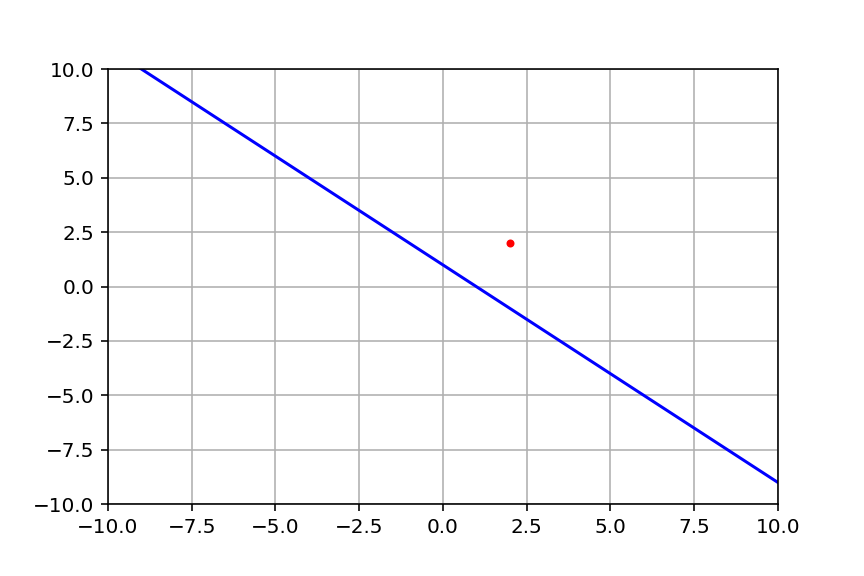

In [11]:
# Example: Line x + y = 1, Point (2, 2)
newPlot()
plot2Dline(1, 1, 1)
plot2Dpoint(2, 2)
plt.show()

<IPython.core.display.Javascript object>


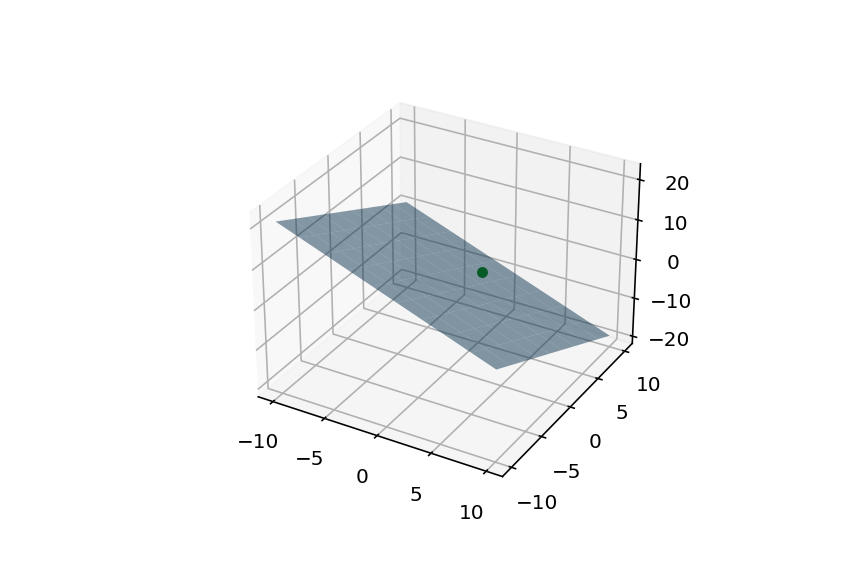

In [12]:
# Example: Plane x + y + z = 1, Point (2, 2, 2)
new3Dplot()
plot3Dplane(1, 1, 1, 1)
plot3Dpoint(2, 2, 2)
plt.show()

<IPython.core.display.Javascript object>


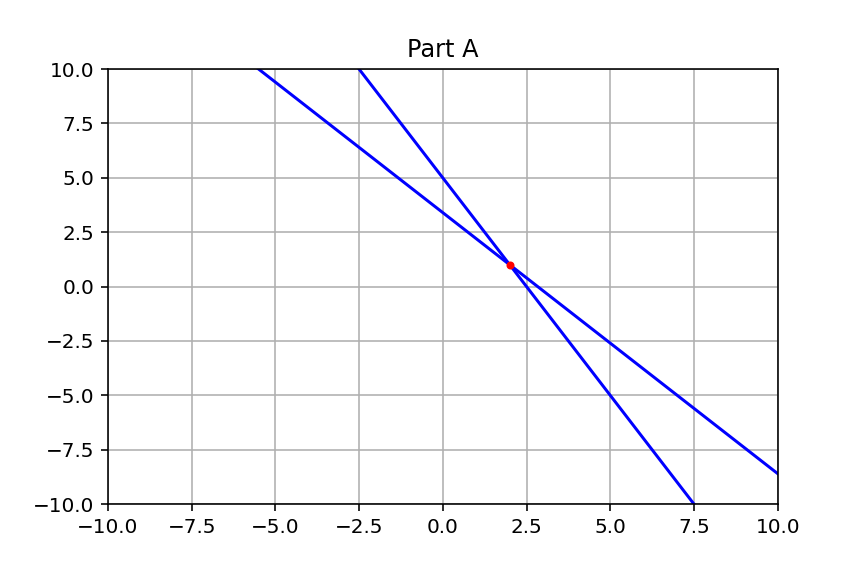

<IPython.core.display.Javascript object>


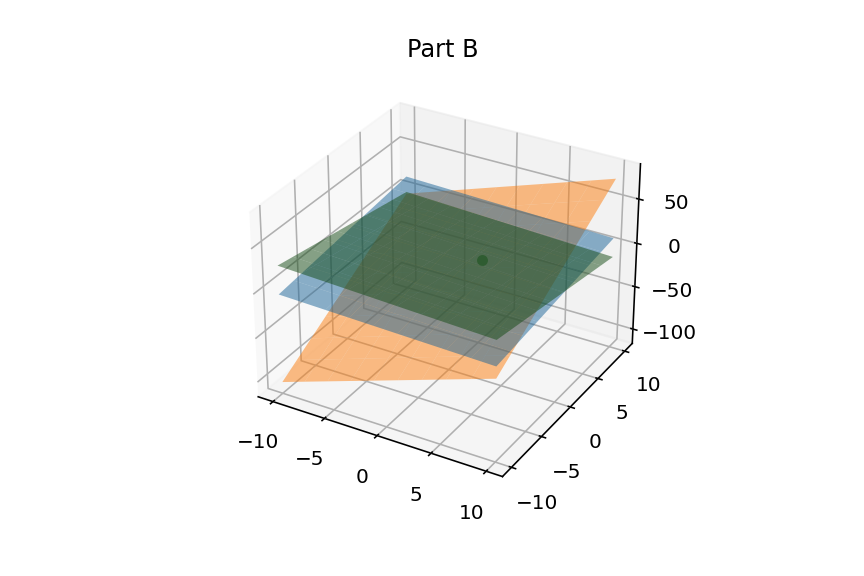

<IPython.core.display.Javascript object>


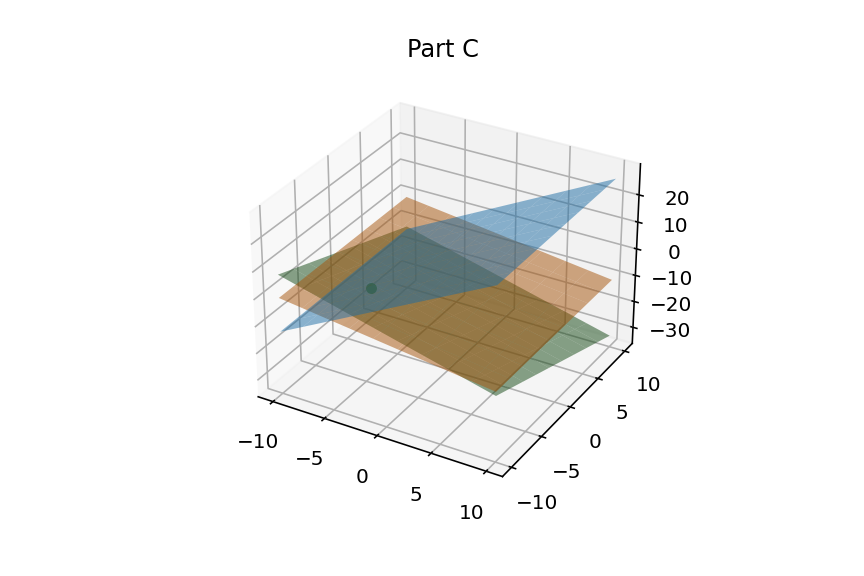

<IPython.core.display.Javascript object>


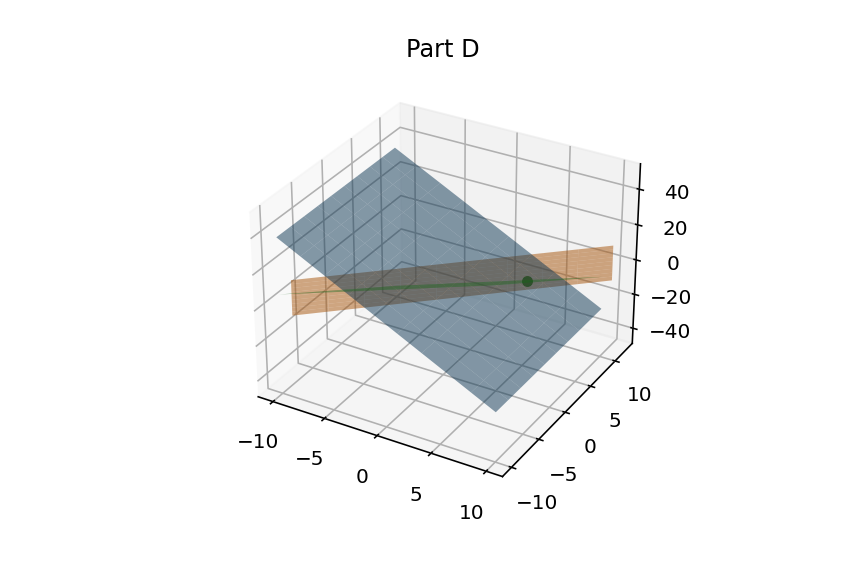

In [13]:
# Part A

# System
# 6x + 5y = 17
# 2x + y = 5

# Solution
# x = 2.00
# y = 1.00

newPlot() # Creating a new 2D plot.
plt.title('Part A') # Titling the new plot.
plot2Dline(6, 5, 17) # Creating the system.
plot2Dline(2, 1, 5)
plot2Dpoint(2, 1) # Creating the point (solution).
plt.show() # Showing the plot.

# Part B

# System
# -x + 3y - 3z = -8
# 4x + 5y - z = 14
# x + 3y + 2z = 16

# Solution
# x = 2.00
# y = 2.00
# z = 4.00

new3Dplot() # Creating a new 3D plot.
plt.title('Part B') # Titling the new plot.
plot3Dplane(-1, 3, -3, -8) # Creating the system.
plot3Dplane(4, 5, -1, 14)
plot3Dplane(1, 3, 2, 16)
plot3Dpoint(2, 2, 4) # Creating the point (solution).
plt.show() # Showing the plot.

# Part C

# System
# -4x + 2z = 14
# -2x - 4z = 22
# x + y + z = -12

# Solution
# x = -5.00
# y = -4.00
# z = -3.00

new3Dplot() # Creating a new 3D plot.
plt.title('Part C') # Titling the new plot.
plot3Dplane(-4, 0, 2, 14) # Creating the system.
plot3Dplane(-2, 0, -4, 22)
plot3Dplane(1, 1, 1, -12)
plot3Dpoint(-5, -4, -3) # Creating the point (solution).
plt.show() # Showing the plot.

# Part D

# System
# -3x + 9 = z
# 3y - 6 = 3x
# -4x + 5y + 2z = 5

# Solution
# x = 4.60
# y = 6.60
# z = -4.80

new3Dplot() # Creating a new 3D plot.
plt.title('Part D') # Titling the new plot.
plot3Dplane(-3, 0, -1, -9) # Creating the system.
plot3Dplane(-3, 3, 0, 6)
plot3Dplane(-4, 5, 2, 5)
plot3Dpoint(4.6, 6.6, -4.8) # Creating the point (solution).
plt.show() # Showing the plot.

## Submitting Your Work

Before handing in via Canvas, make sure:
* Your notebook runs from top to bottom after selecting "Kernel->Restart & Run All" without causing any errors. To simplify the grading process, please do **not** clear the generated output.
* You have included any scans/images that your notebook references.
* You have renamed the provided notebook according to your name and NetId as: **[YourFirstName]\_[YourLastName]\_[YourNetId]\_[Assignment].ipynb**. For example, if John Doe has NetId **F00237S**, his submission filename for PA1 should be **John_Doe_F00237S_PA1.ipynb**.